In [ ]:
###### Lista de bibliotecas #####
# Numpy: biblioteca de calculo numerico do python
# pandas: biblioteca para operação sobre dados tabulares
# matplotlib: biblioteca para plotar gráficos
# seaborn: biblioteca de alto nível para plotar gráficos baseados no matplotlib
# yahooquery: biblioteca para consultar dados do Yahoo Finance

###### Instalação de bibliotecas #####
# Use o seguinte comando: !pip install <nome_biblioteca>
# Exemplo: !pip install yahooquery

In [4]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from yahooquery import Ticker

In [32]:
# Definir uma lista de simbolos (ações) de interesse
symbols_list = ['AMZN', 'WMT']
# Criar um objeto Ticker (para fazer o download de dados de cotação de ações)
tc = Ticker(symbols_list)
# Fazer o download de dados de um período de 60 dias, com intervalor de 1d entre cada medição
# Lista de períodos e intervalos possíveis: https://yahooquery.dpguthrie.com/guide/ticker/historical/
df = tc.history(period='10d', interval="1d")
# Mostrar os primeiros 5 registros do dataframe df
df = df['close']
df.head()

symbol  date      
AMZN    2021-02-03    3312.530029
        2021-02-04    3331.000000
        2021-02-05    3352.149902
        2021-02-08    3322.939941
        2021-02-09    3305.000000
Name: close, dtype: float64

In [33]:
# Converter o índice (multi-nível) em colunas
df_reset = df.reset_index()
df_reset.head()

,symbol,date,close
0,AMZN,2021-02-03,3312.530029
1,AMZN,2021-02-04,3331.000000
2,AMZN,2021-02-05,3352.149902
3,AMZN,2021-02-08,3322.939941
4,AMZN,2021-02-09,3305.000000


In [34]:
# Criar uma nova coluna com a data do dia anterior
df_reset['ontem'] = df_reset['date'].apply(lambda x: x + datetime.timedelta(days=1))
df_reset

,symbol,date,close,ontem
0,AMZN,2021-02-03,3312.530029,2021-02-04
1,AMZN,2021-02-04,3331.000000,2021-02-05
2,AMZN,2021-02-05,3352.149902,2021-02-06
3,AMZN,2021-02-08,3322.939941,2021-02-09
4,AMZN,2021-02-09,3305.000000,2021-02-10
5,AMZN,2021-02-10,3286.580078,2021-02-11
6,AMZN,2021-02-11,3262.129883,2021-02-12
7,AMZN,2021-02-12,3277.709961,2021-02-13
8,AMZN,2021-02-16,3268.949951,2021-02-17
9,AMZN,2021-02-17,3308.639893,2021-02-18


In [35]:
# Realizar um merge da data atual com a data do dia anterior
df_merge = df_reset.merge(right=df_reset, left_on=['symbol','date'], right_on=['symbol','ontem'], suffixes=["", "_desloc"])
df_merge.head()

,symbol,date,close,ontem,date_desloc,close_desloc,ontem_desloc
0,AMZN,2021-02-04,3331.000000,2021-02-05,2021-02-03,3312.530029,2021-02-04
1,AMZN,2021-02-05,3352.149902,2021-02-06,2021-02-04,3331.000000,2021-02-05
2,AMZN,2021-02-09,3305.000000,2021-02-10,2021-02-08,3322.939941,2021-02-09
3,AMZN,2021-02-10,3286.580078,2021-02-11,2021-02-09,3305.000000,2021-02-10
4,AMZN,2021-02-11,3262.129883,2021-02-12,2021-02-10,3286.580078,2021-02-11


In [38]:
# Calcular a diferença percentual de um dia para o outro
# (v_hoje - v_ontem ) / v_ontem
df_merge['change_pct'] = (df_merge['close'] - df_merge['close_desloc']) / df_merge['close_desloc']
df_merge

,symbol,date,close,ontem,date_desloc,close_desloc,ontem_desloc,change_pct
0,AMZN,2021-02-04,3331.000000,2021-02-05,2021-02-03,3312.530029,2021-02-04,0.005576
1,AMZN,2021-02-05,3352.149902,2021-02-06,2021-02-04,3331.000000,2021-02-05,0.006349
2,AMZN,2021-02-09,3305.000000,2021-02-10,2021-02-08,3322.939941,2021-02-09,-0.005399
3,AMZN,2021-02-10,3286.580078,2021-02-11,2021-02-09,3305.000000,2021-02-10,-0.005573
4,AMZN,2021-02-11,3262.129883,2021-02-12,2021-02-10,3286.580078,2021-02-11,-0.007439
5,AMZN,2021-02-12,3277.709961,2021-02-13,2021-02-11,3262.129883,2021-02-12,0.004776
6,AMZN,2021-02-17,3308.639893,2021-02-18,2021-02-16,3268.949951,2021-02-17,0.012141
7,WMT,2021-02-04,142.529999,2021-02-05,2021-02-03,141.199997,2021-02-04,0.009419
8,WMT,2021-02-05,144.360001,2021-02-06,2021-02-04,142.529999,2021-02-05,0.012839
9,WMT,2021-02-09,145.830002,2021-02-10,2021-02-08,145.029999,2021-02-09,0.005516


In [39]:
df_pivot = df_merge.pivot('date', 'symbol', 'change_pct')
df_pivot

symbol,AMZN,WMT
date,,
2021-02-04,0.005576,0.009419
2021-02-05,0.006349,0.012839
2021-02-09,-0.005399,0.005516
2021-02-10,-0.005573,-0.011657
2021-02-11,-0.007439,-0.000763
2021-02-12,0.004776,0.003125
2021-02-17,0.012141,0.010573


In [40]:
df_pivot.corr()

symbol,AMZN,WMT
symbol,,
AMZN,1.000000,0.724486
WMT,0.724486,1.000000


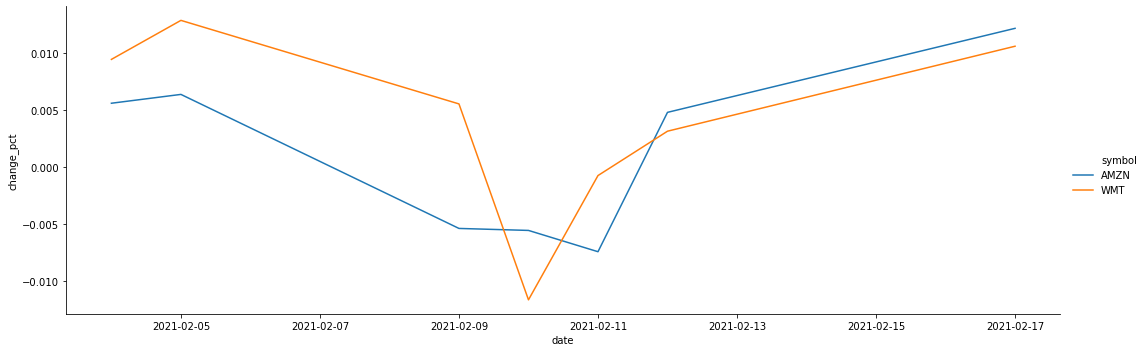

In [41]:
# Curiosidade: Plotar o gráfico da variação da cotação diária
import seaborn as sns
# Plotar um gráfico de linhas
# data: dataframe com os dados
# kind: tipo do grafico de relacionamento. Opções: scatter e line
# x: nome da coluna a ser plotada no eixo x
# y: nome da coluna a ser plotada no eixo y
# hue: coluna de agregação, cujas séries serão representadas por cores distintas.
sns.relplot(data=df_merge, kind='line', aspect=3, x='date', y='change_pct', hue='symbol')
